In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal

In [43]:
def load_bci_data(path):
    df = pd.read_csv(path, skiprows=4)
    df = df[[' EXG Channel 0', ' EXG Channel 1', ' EXG Channel 2', ' Timestamp']]
    df.columns = ['EXG Channel 0', 'EXG Channel 1', 'EXG Channel 2', 'Timestamp']
    return df

def get_last_n_mins(df: pd.DataFrame, n: int) -> pd.DataFrame:
    timestamps = df['Timestamp']
    return df[timestamps > timestamps.max() - (60 * n)].reset_index(drop=True)

df1 = load_bci_data('../raw-data/OpenBCI-RAW-2023-02-28_11-36-07.txt')
df2 = load_bci_data('../raw-data\OpenBCI-RAW-2023-02-28_11-50-54.txt')
df3 = load_bci_data('../raw-data\OpenBCI-RAW-2023-02-28_12-16-31.txt')
df4 = load_bci_data('../raw-data\OpenBCI-RAW-2023-02-28_12-29-54.txt')
df5 = load_bci_data('../raw-data\OpenBCI-RAW-2023-02-28_12-41-46.txt')
df1 = get_last_n_mins(df1, 5)
df2 = get_last_n_mins(df2, 5)
df3 = get_last_n_mins(df3, 5)
df4 = get_last_n_mins(df4, 5)
df5 = get_last_n_mins(df5, 5)

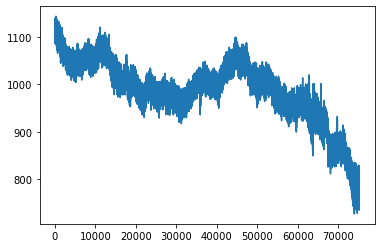

In [44]:
plt.plot(df['EXG Channel 1'][1:])

In [45]:
channels = np.array(['Fp1', 'CP3',  'CP4'])

In [46]:
# Define our filter variables
fs = 250.0                      # Hz; sampling rate
dt = 1000. / fs                 # ms; time between samples
sdt = np.round(dt).astype(int); # rounded dt so that we can index samples
hp = 0.1                        # Hz; our low cut for our bandpass
lp = 30.                        # Hz; our high cut for our bandpass
num_taps = 31                   # Number of taps/coefficients of FIR filter

# Create our filter coefficients
# Note: by defining 'fs' we don't divide our windows by the Nyquist
# Note: for FIR filters, a is always 1
b = signal.firwin(numtaps=num_taps, cutoff=[hp, lp], pass_zero='bandpass', fs=fs)
a = 1

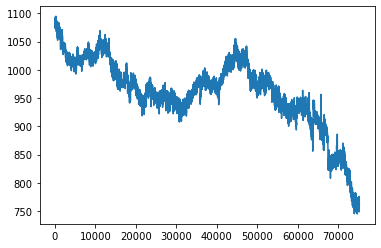

In [47]:
data1 = signal.filtfilt(b, a, (df1['EXG Channel 1'][1:]), axis=0)
plt.plot(data1)

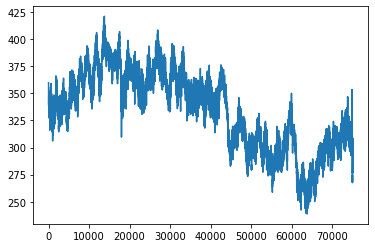

In [49]:
data2 = signal.filtfilt(b, a, (df2['EXG Channel 1'][1:]), axis=0)
plt.plot(data2)

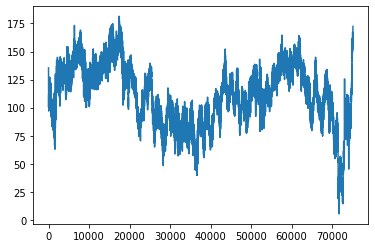

In [50]:
data3 = signal.filtfilt(b, a, (df3['EXG Channel 1'][1:]), axis=0)
plt.plot(data3)

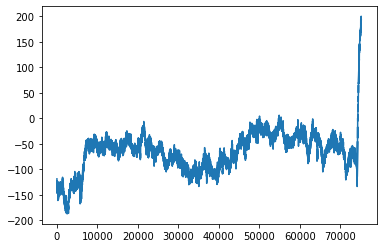

In [51]:
data4 = signal.filtfilt(b, a, (df4['EXG Channel 1'][1:]), axis=0)
plt.plot(data4)

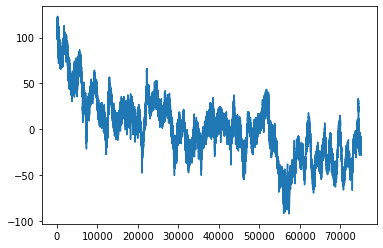

In [52]:
data5 = signal.filtfilt(b, a, (df5['EXG Channel 1'][1:]), axis=0)
plt.plot(data5)